### Importing Libraries

In [1]:
# for linear algebra and data processing
import numpy as np
import pandas as pd 

# for visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# for data preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for math and statistics
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#for missing numbers
import missingno as msno

# to ignnore warnings
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
df1 = pd.read_csv("labs.csv")
df2 = pd.read_csv("examination.csv")
df3 = pd.read_csv("demographic.csv")
df4 = pd.read_csv("diet.csv")
df5 = pd.read_csv("questionnaire.csv")

In [3]:
df5.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [4]:
df5.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [5]:
df5.shape

(10175, 953)

In [6]:
print(df1['SEQN'].shape)#,df5['SEQN'].shape)

(9813,)


In [7]:
df2.drop(["SEQN"], axis=1, inplace = True)
df3.drop(["SEQN"], axis=1, inplace = True)
df4.drop(["SEQN"], axis=1, inplace = True)
df5.drop(["SEQN"], axis=1, inplace = True)

In [8]:
df = pd.concat([df1, df2], axis = 1, join = "inner")
df = pd.concat([df, df3], axis = 1, join = "inner")
df = pd.concat([df, df4], axis = 1, join = "inner")
df = pd.concat([df, df5], axis = 1, join = "inner")


In [9]:
df.shape

(9813, 1812)

In [10]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [11]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [12]:
df.shape

(9813, 1812)

In [13]:
df.columns

Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
       'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
       ...
       'WHD080U', 'WHD080L', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object', length=1812)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 1812 entries, SEQN to WHQ520
dtypes: float64(1753), int64(28), object(31)
memory usage: 135.7+ MB


In [15]:
#removing rows and columns that have ALL non-values
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,0.88,4.9,...,NaN,NaN,130.0,122.0,NaN,168.0,48.0,NaN,NaN,NaN
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,210.0,NaN,260.0,20.0,NaN,NaN,NaN
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,NaN,NaN,120.0,100.0,NaN,125.0,42.0,NaN,NaN,NaN


In [16]:
df["SMQ040"].value_counts() #smoking 3 --> not at all , 2 --> Some days , 1 ---> everyday

3.0    1298
1.0     953
2.0     233
Name: SMQ040, dtype: int64

In [17]:
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'LBDLDL' : 'LDL', 
                          'BMXARMC' : 'MUAC',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'RHQ160' : 'Num_pregnant',
                          'LBXIN' : 'Insulin',
                          'DIQ300S' : 'Blood_pressure',
                          "BMXBMI" : 'Bmi',
                          'SMQ040' : 'Smoking',
                          'SLD010H' : 'Time_asleep',
                          'BPXSY1' : "Sys_bp1",
                          'BPXSY2' : "Sys_bp2",
                          'BPXSY3' : "Sys_bp3",
                          'BPXSY4' : "Sys_bp4",
                          'BPXDI1' : 'dia_bp1',
                          'BPXDI2' : 'dia_bp2',
                          'BPXDI3' : 'dia_bp3',
                          'BPXDI4' : 'dia_bp4',
                          'MCQ160C' : 'CHD',
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'A1C',
                          "RIDRETH1" : "Race",
                          "DMDHRMAR" : "Ever_married",
                          "DIQ010"   : "Diabetes",
                          'BPQ020' : 'hypertension',
                          "BPQ080" : "Hypercholesterolemia",
                          'LBXTC' : 'Cholesterol_level'})

In [18]:
data = df.loc[:,["ID","Gender","LDL",'MUAC','SaggitalAbdominal',
                 'Insulin','Blood_pressure','Bmi','Smoking',
                 'Time_asleep',"Sys_bp1","Sys_bp2","Sys_bp3","Sys_bp4",
                 'dia_bp1','dia_bp2','dia_bp3','dia_bp4','CHD','Family_income',"Race",
                 "hypertension",'A1C',"Ever_married", "Hypercholesterolemia",
                          "Diabetes"]]

In [19]:
data["Num_pregnant"] = df["Num_pregnant"]
data["Cholesterol_level"] = df["Cholesterol_level"]

In [20]:
data.describe()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Blood_pressure,Bmi,Smoking,Time_asleep,...,CHD,Family_income,Race,hypertension,A1C,Ever_married,Hypercholesterolemia,Diabetes,Num_pregnant,Cholesterol_level
count,9813.000000,9813.000000,3105.000000,9301.000000,7218.000000,3093.000000,708.000000,9055.000000,2484.000000,6227.000000,...,5561.000000,9051.000000,9813.000000,6229.000000,6643.000000,9696.000000,6229.000000,9422.000000,2118.000000,7624.000000
mean,78644.559971,1.509426,106.221256,28.485765,21.114034,13.526809,3869.728814,25.678244,2.138889,7.050104,...,1.982377,2.253101,3.092734,1.669289,5.642556,2.737314,1.723712,1.947145,3.468839,179.534103
std,2938.592266,0.499937,34.988663,7.961971,4.963949,18.638388,4784.080725,7.955137,0.941948,3.398200,...,0.445657,1.635458,1.263960,0.516077,1.004850,5.924851,0.711127,0.346588,2.691810,40.954000
min,73557.000000,1.000000,14.000000,10.400000,10.100000,0.140000,88.000000,12.100000,1.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,3.500000,1.000000,1.000000,1.000000,1.000000,69.000000
25%,76092.000000,1.000000,81.000000,22.600000,17.300000,6.080000,123.000000,19.700000,1.000000,6.000000,...,2.000000,0.870000,2.000000,1.000000,5.200000,1.000000,1.000000,2.000000,2.000000,151.000000
50%,78643.000000,2.000000,103.000000,29.300000,20.700000,9.470000,140.000000,24.700000,3.000000,7.000000,...,2.000000,1.710000,3.000000,2.000000,5.400000,1.000000,2.000000,2.000000,3.000000,175.000000
75%,81191.000000,2.000000,127.000000,34.000000,24.400000,15.350000,9999.000000,30.200000,3.000000,8.000000,...,2.000000,3.610000,4.000000,2.000000,5.800000,4.000000,2.000000,2.000000,4.000000,204.000000
max,83731.000000,2.000000,375.000000,59.400000,40.100000,682.480000,9999.000000,82.900000,3.000000,99.000000,...,9.000000,5.000000,5.000000,9.000000,17.500000,99.000000,9.000000,9.000000,77.000000,813.000000


In [21]:
data.shape

(9813, 28)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9813 non-null   int64  
 1   Gender                9813 non-null   int64  
 2   LDL                   3105 non-null   float64
 3   MUAC                  9301 non-null   float64
 4   SaggitalAbdominal     7218 non-null   float64
 5   Insulin               3093 non-null   float64
 6   Blood_pressure        708 non-null    float64
 7   Bmi                   9055 non-null   float64
 8   Smoking               2484 non-null   float64
 9   Time_asleep           6227 non-null   float64
 10  Sys_bp1               7172 non-null   float64
 11  Sys_bp2               7409 non-null   float64
 12  Sys_bp3               7408 non-null   float64
 13  Sys_bp4               515 non-null    float64
 14  dia_bp1               7172 non-null   float64
 15  dia_bp2              

In [23]:
null = (data.isnull().sum())/(data.shape[0]) * 100
data_null = pd.DataFrame({'percentage':null})

In [24]:
data_null

,percentage
ID,0.000000
Gender,0.000000
LDL,68.358300
MUAC,5.217569
SaggitalAbdominal,26.444512
Insulin,68.480587
Blood_pressure,92.785081
Bmi,7.724447
Smoking,74.686640
Time_asleep,36.543361


In [25]:
data.dropna(thresh = 12)

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Blood_pressure,Bmi,Smoking,Time_asleep,...,CHD,Family_income,Race,hypertension,A1C,Ever_married,Hypercholesterolemia,Diabetes,Num_pregnant,Cholesterol_level
0,73557,1,NaN,35.3,20.6,NaN,9999.0,26.7,3.0,7.0,...,2.0,0.84,4,1.0,13.9,4.0,1.0,1.0,NaN,167.0
1,73558,1,NaN,34.7,24.4,NaN,128.0,28.6,2.0,9.0,...,2.0,1.78,3,1.0,9.1,1.0,1.0,1.0,NaN,170.0
2,73559,1,56.0,33.5,25.6,5.83,136.0,28.9,3.0,8.0,...,2.0,4.51,3,1.0,8.9,1.0,1.0,1.0,NaN,126.0
3,73560,1,NaN,21.0,14.9,NaN,NaN,17.1,NaN,NaN,...,NaN,2.52,3,NaN,NaN,1.0,NaN,2.0,NaN,168.0
4,73561,2,101.0,25.2,NaN,6.12,NaN,19.7,NaN,9.0,...,2.0,5.00,3,1.0,4.9,1.0,2.0,2.0,3.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,83726,1,NaN,31.0,23.1,NaN,NaN,26.8,3.0,6.0,...,2.0,1.27,1,2.0,NaN,1.0,2.0,2.0,NaN,NaN
9808,83727,2,119.0,29.9,19.1,3.76,NaN,24.5,NaN,7.0,...,2.0,1.25,2,2.0,5.0,1.0,2.0,2.0,NaN,190.0
9810,83729,1,NaN,37.0,24.3,NaN,NaN,34.0,1.0,5.0,...,2.0,5.00,1,2.0,5.3,1.0,2.0,2.0,NaN,152.0
9811,83730,2,NaN,19.0,NaN,NaN,NaN,16.1,NaN,7.0,...,2.0,1.53,5,2.0,NaN,2.0,2.0,2.0,1.0,167.0


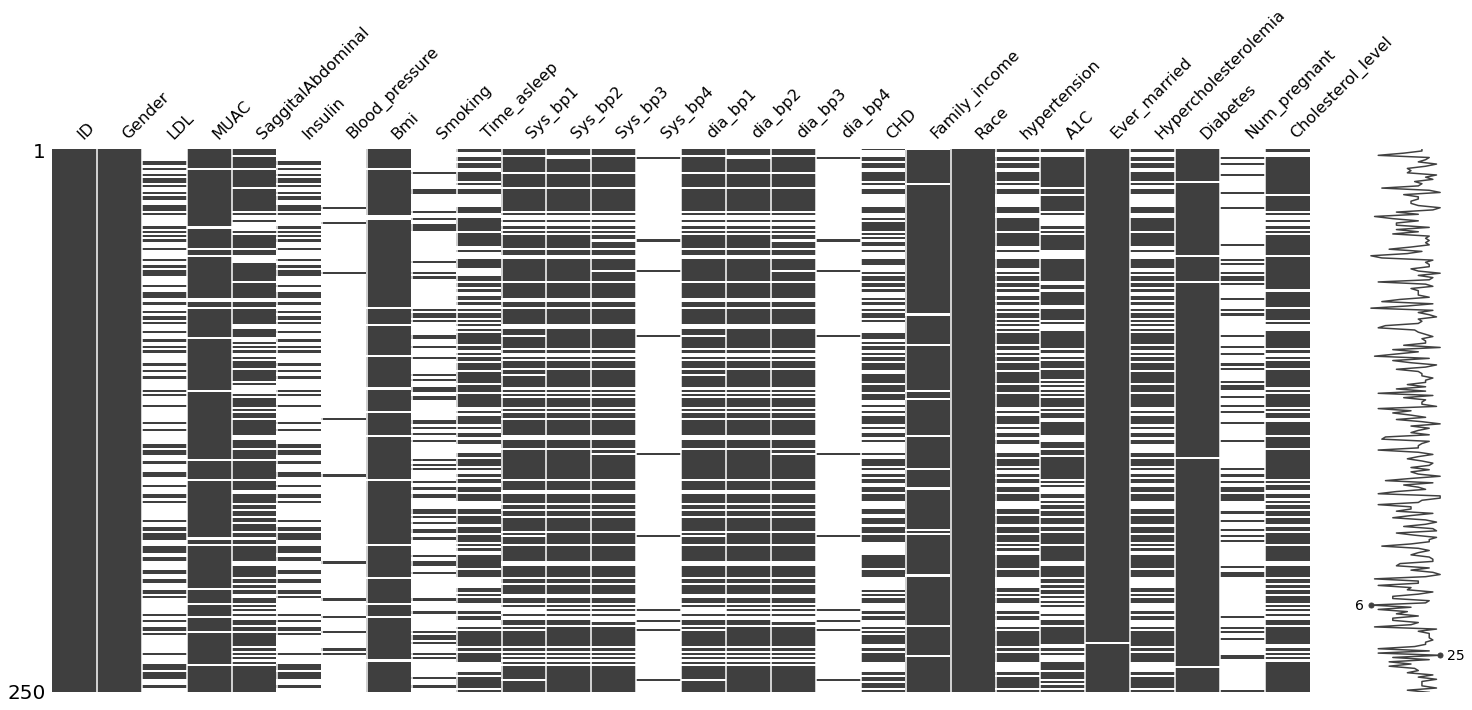

In [26]:
msno.matrix(data.sample(250));   #sampling 250

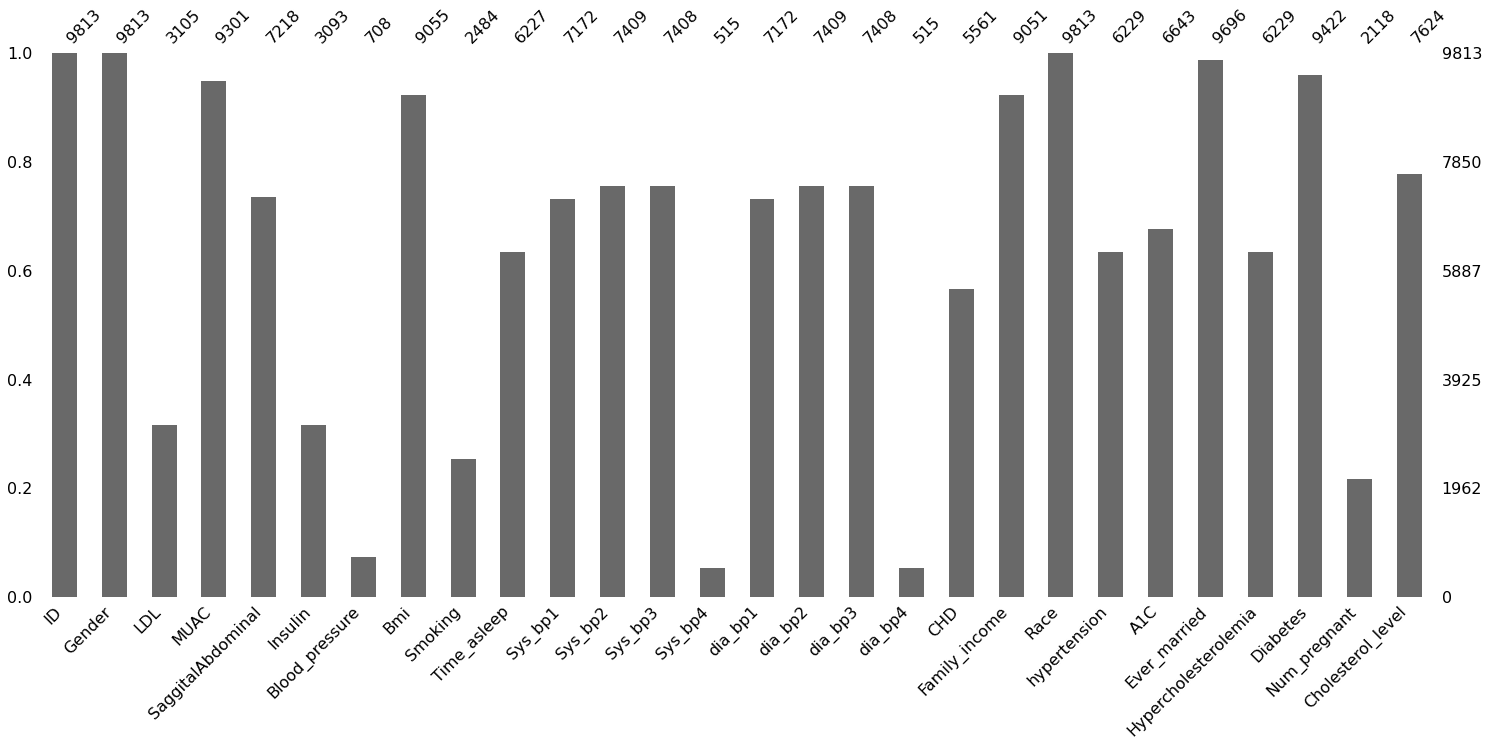

In [27]:
msno.bar(data);

<AxesSubplot:>

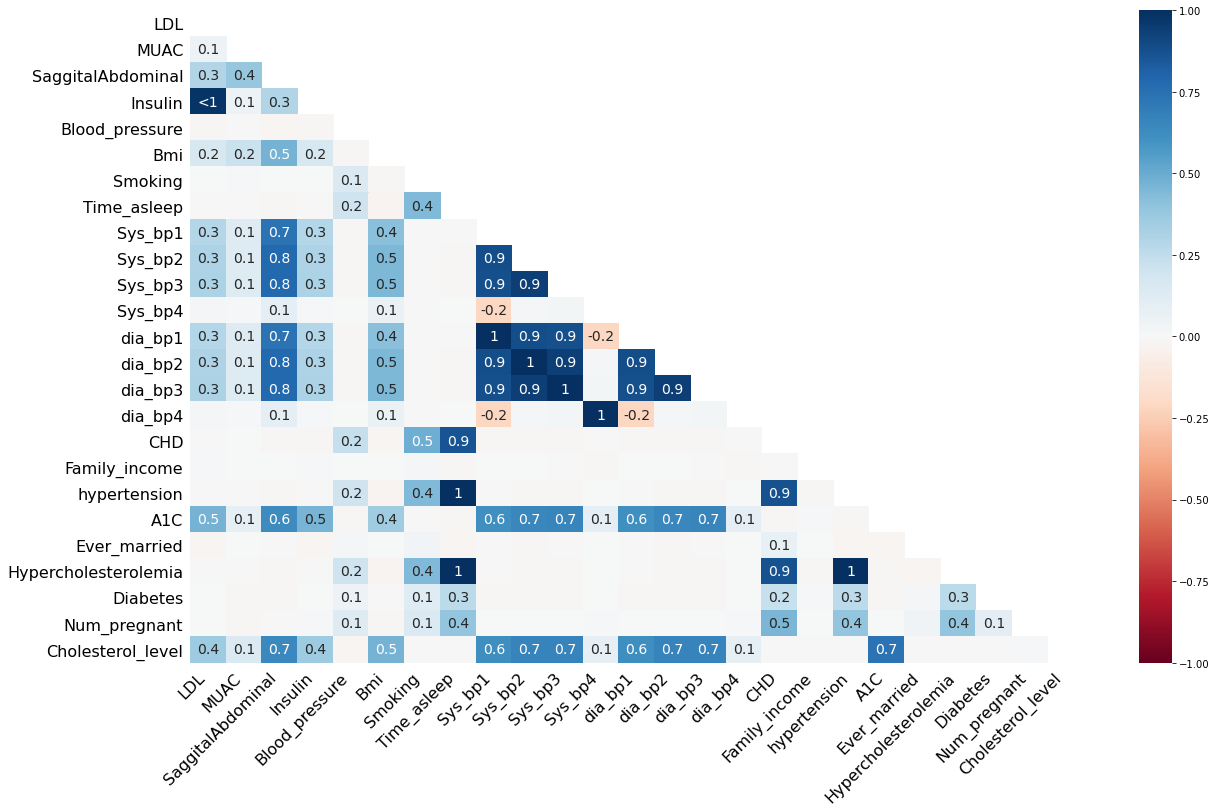

In [28]:
msno.heatmap(data)


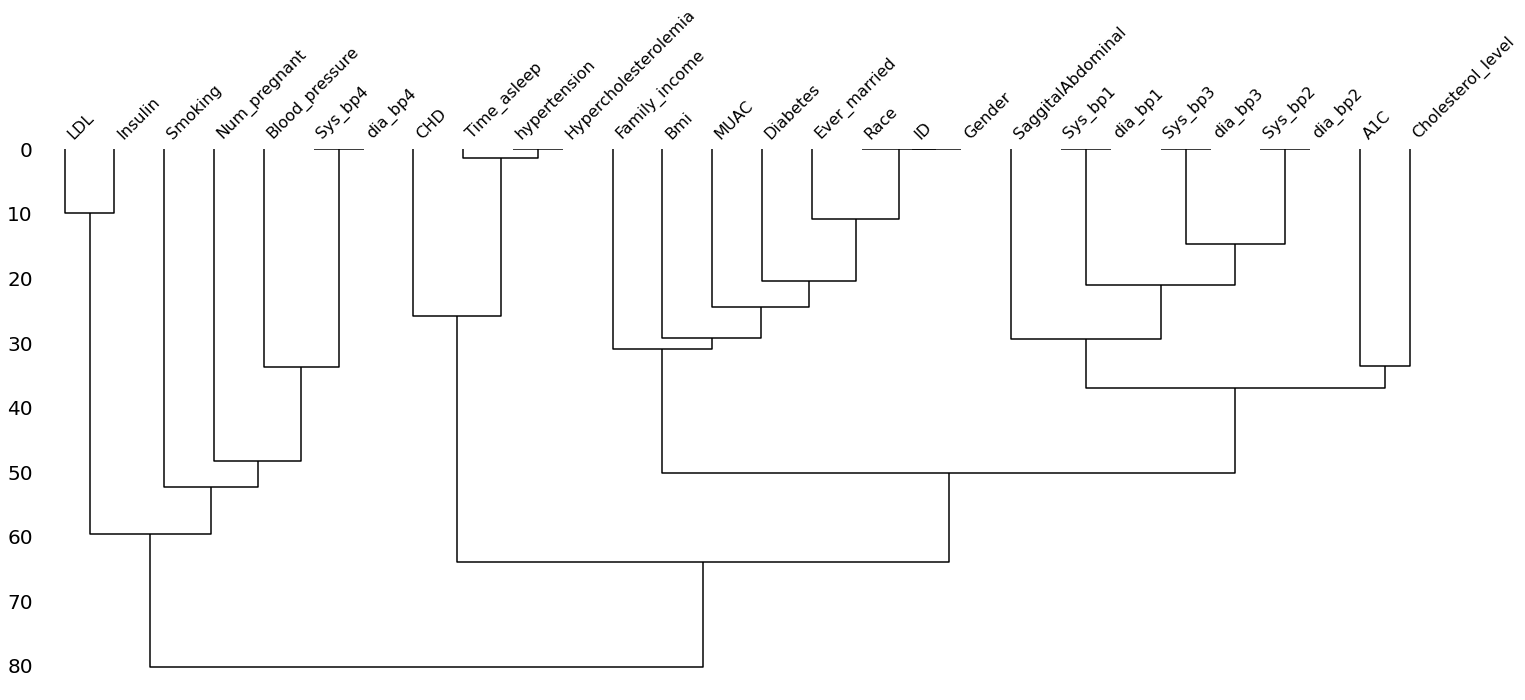

In [29]:
msno.dendrogram(data);

In [30]:
data.dropna(thresh=18, inplace = True)    #If the row has 18 non-null values or more, it should not be deleted.

In [31]:
data.shape                                 #the number of observations now reduced

(5794, 28)

In [32]:
data.isnull().sum()

ID                         0
Gender                     0
LDL                     2840
MUAC                     146
SaggitalAbdominal        331
Insulin                 2850
Blood_pressure          5257
Bmi                       38
Smoking                 3881
Time_asleep             1040
Sys_bp1                  288
Sys_bp2                  108
Sys_bp3                  102
Sys_bp4                 5412
dia_bp1                  288
dia_bp2                  108
dia_bp3                  102
dia_bp4                 5412
CHD                     1541
Family_income            432
Race                       0
hypertension            1038
A1C                      689
Ever_married              73
Hypercholesterolemia    1038
Diabetes                  91
Num_pregnant            4150
Cholesterol_level        284
dtype: int64

In [33]:
missing = data[data["Hypercholesterolemia"].isnull() & data["hypertension"].isnull()]

In [34]:
missing.shape

(1038, 28)

In [35]:
data.drop(missing.index, inplace = True)

In [36]:
data.shape

(4756, 28)

In [37]:
data.isnull().sum()

ID                         0
Gender                     0
LDL                     2825
MUAC                     144
SaggitalAbdominal        304
Insulin                 2837
Blood_pressure          4222
Bmi                       37
Smoking                 2843
Time_asleep                2
Sys_bp1                  246
Sys_bp2                   98
Sys_bp3                   95
Sys_bp4                 4433
dia_bp1                  246
dia_bp2                   98
dia_bp3                   95
dia_bp4                 4433
CHD                      503
Family_income            372
Race                       0
hypertension               0
A1C                      689
Ever_married              64
Hypercholesterolemia       0
Diabetes                   0
Num_pregnant            3112
Cholesterol_level        284
dtype: int64

In [38]:
null2 = (data.isnull().sum())/(data.shape[0]) * 100
data_null2 = pd.DataFrame({'percentage':null2})

In [39]:
data_null2

,percentage
ID,0.000000
Gender,0.000000
LDL,59.398654
MUAC,3.027754
SaggitalAbdominal,6.391926
Insulin,59.650967
Blood_pressure,88.772077
Bmi,0.777965
Smoking,59.777124
Time_asleep,0.042052


In [40]:
data_high = data_null2[data_null2['percentage'] > 70]
data_high

,percentage
Blood_pressure,88.772077
Sys_bp4,93.208579
dia_bp4,93.208579


In [41]:
data.drop(list(data_high.index),axis=1, inplace=True)

In [42]:
data.shape

(4756, 25)

In [43]:
data["Sys_bp"] = (data["Sys_bp1"] +  data["Sys_bp2"] + data["Sys_bp3"])/3
data["dia_bp"] = (data["dia_bp1"] + data["dia_bp2"] + data["dia_bp3"] )/3

In [44]:
data.drop(['Sys_bp1', 'Sys_bp2',
    'Sys_bp3', 'dia_bp1', 'dia_bp2', 'dia_bp3'], axis= 1, inplace = True)

In [45]:
data.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,...,Race,hypertension,A1C,Ever_married,Hypercholesterolemia,Diabetes,Num_pregnant,Cholesterol_level,Sys_bp,dia_bp
0,73557,1,NaN,35.3,20.6,NaN,26.7,3.0,7.0,2.0,...,4,1.0,13.9,4.0,1.0,1.0,NaN,167.0,112.666667,74.000000
1,73558,1,NaN,34.7,24.4,NaN,28.6,2.0,9.0,2.0,...,3,1.0,9.1,1.0,1.0,1.0,NaN,170.0,157.333333,61.333333
2,73559,1,56.0,33.5,25.6,5.83,28.9,3.0,8.0,2.0,...,3,1.0,8.9,1.0,1.0,1.0,NaN,126.0,142.000000,82.000000
4,73561,2,101.0,25.2,NaN,6.12,19.7,NaN,9.0,2.0,...,3,1.0,4.9,1.0,2.0,2.0,3.0,201.0,137.333333,86.666667
5,73562,1,NaN,41.8,29.1,NaN,41.7,3.0,5.0,1.0,...,1,1.0,5.5,3.0,1.0,2.0,NaN,226.0,157.333333,82.000000


In [46]:
cols  = ['ID', 'Gender', 'LDL', 'MUAC', 'SaggitalAbdominal', 'Insulin', 'Bmi',
       'Smoking', 'Time_asleep', 'CHD', 'Family_income',
       'Ever_married', 'Num_pregnant', "Race",
       'Cholesterol_level', 'Sys_bp', 'dia_bp', 'Hypercholesterolemia', 'hypertension', 'Diabetes']

In [47]:
data = data[cols]     #rearranging our columns

In [48]:
data.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,73557,1,NaN,35.3,20.6,NaN,26.7,3.0,7.0,2.0,0.84,4.0,NaN,4,167.0,112.666667,74.000000,1.0,1.0,1.0
1,73558,1,NaN,34.7,24.4,NaN,28.6,2.0,9.0,2.0,1.78,1.0,NaN,3,170.0,157.333333,61.333333,1.0,1.0,1.0
2,73559,1,56.0,33.5,25.6,5.83,28.9,3.0,8.0,2.0,4.51,1.0,NaN,3,126.0,142.000000,82.000000,1.0,1.0,1.0
4,73561,2,101.0,25.2,NaN,6.12,19.7,NaN,9.0,2.0,5.00,1.0,3.0,3,201.0,137.333333,86.666667,2.0,1.0,2.0
5,73562,1,NaN,41.8,29.1,NaN,41.7,3.0,5.0,1.0,4.79,3.0,NaN,1,226.0,157.333333,82.000000,1.0,1.0,2.0


In [49]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
data = data.sample(frac=1).reset_index(drop=True)

In [50]:
# top 3329 rows are selected
# for training
data_train = data.head(3329).copy()
# bottom 1427 values are selected
# for testing/validation
data_test = data.tail(1427).copy()

In [51]:
data_train.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,81974,2,NaN,36.5,22.3,NaN,30.5,NaN,8.0,2.0,3.48,2.0,3.0,3,187.0,114.000000,69.333333,1.0,2.0,2.0
1,81093,1,101.0,46.7,29.4,8.59,51.9,3.0,7.0,2.0,2.50,2.0,NaN,3,171.0,116.666667,66.666667,2.0,1.0,3.0
2,78298,2,NaN,31.2,20.6,NaN,25.4,NaN,8.0,2.0,1.70,1.0,4.0,3,92.0,101.333333,57.333333,1.0,2.0,2.0
3,83171,1,NaN,37.5,21.5,NaN,32.9,NaN,7.0,2.0,5.00,1.0,NaN,5,175.0,111.333333,68.000000,2.0,2.0,2.0
4,76126,2,NaN,47.7,30.6,NaN,47.2,NaN,8.0,2.0,NaN,1.0,5.0,1,200.0,NaN,NaN,2.0,1.0,2.0


In [52]:
data_train.to_csv("train.csv", index = False)
data_test.to_csv("test.csv", index = False)

In [53]:
data_train.to_csv("train.csv", index = False)

In [54]:
data_test.to_csv("test.csv", index = False)

In [55]:
data_train.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,81974,2,NaN,36.5,22.3,NaN,30.5,NaN,8.0,2.0,3.48,2.0,3.0,3,187.0,114.000000,69.333333,1.0,2.0,2.0
1,81093,1,101.0,46.7,29.4,8.59,51.9,3.0,7.0,2.0,2.50,2.0,NaN,3,171.0,116.666667,66.666667,2.0,1.0,3.0
2,78298,2,NaN,31.2,20.6,NaN,25.4,NaN,8.0,2.0,1.70,1.0,4.0,3,92.0,101.333333,57.333333,1.0,2.0,2.0
3,83171,1,NaN,37.5,21.5,NaN,32.9,NaN,7.0,2.0,5.00,1.0,NaN,5,175.0,111.333333,68.000000,2.0,2.0,2.0
4,76126,2,NaN,47.7,30.6,NaN,47.2,NaN,8.0,2.0,NaN,1.0,5.0,1,200.0,NaN,NaN,2.0,1.0,2.0


In [56]:
data_test.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
3329,75553,1,NaN,32.5,27.0,NaN,30.6,3.0,8.0,2.0,2.36,1.0,NaN,1,230.0,117.333333,53.333333,2.0,1.0,2.0
3330,82373,2,NaN,25.4,16.5,NaN,20.9,NaN,8.0,2.0,5.00,3.0,NaN,5,142.0,111.333333,66.666667,2.0,2.0,2.0
3331,82340,1,NaN,NaN,NaN,NaN,NaN,3.0,6.0,1.0,2.30,1.0,NaN,4,181.0,95.333333,47.333333,2.0,2.0,1.0
3332,74991,2,NaN,27.2,18.3,NaN,24.4,NaN,6.0,2.0,4.25,1.0,NaN,5,149.0,106.000000,57.333333,2.0,2.0,2.0
3333,74594,1,NaN,38.2,27.9,NaN,35.1,1.0,9.0,2.0,0.54,1.0,NaN,3,194.0,NaN,NaN,2.0,1.0,2.0


In [57]:
data_train.isnull().sum()

ID                         0
Gender                     0
LDL                     1993
MUAC                      97
SaggitalAbdominal        206
Insulin                 2002
Bmi                       23
Smoking                 1995
Time_asleep                1
CHD                      353
Family_income            256
Ever_married              51
Num_pregnant            2184
Race                       0
Cholesterol_level        196
Sys_bp                   276
dia_bp                   276
Hypercholesterolemia       0
hypertension               0
Diabetes                   0
dtype: int64

In [58]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [59]:
df_train.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,81974,2,NaN,36.5,22.3,NaN,30.5,NaN,8.0,2.0,3.48,2.0,3.0,3,187.0,114.000000,69.333333,1.0,2.0,2.0
1,81093,1,101.0,46.7,29.4,8.59,51.9,3.0,7.0,2.0,2.50,2.0,NaN,3,171.0,116.666667,66.666667,2.0,1.0,3.0
2,78298,2,NaN,31.2,20.6,NaN,25.4,NaN,8.0,2.0,1.70,1.0,4.0,3,92.0,101.333333,57.333333,1.0,2.0,2.0
3,83171,1,NaN,37.5,21.5,NaN,32.9,NaN,7.0,2.0,5.00,1.0,NaN,5,175.0,111.333333,68.000000,2.0,2.0,2.0
4,76126,2,NaN,47.7,30.6,NaN,47.2,NaN,8.0,2.0,NaN,1.0,5.0,1,200.0,NaN,NaN,2.0,1.0,2.0


In [60]:
df_train.describe()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
count,3329.000000,3329.000000,1336.000000,3232.000000,3123.000000,1327.000000,3306.000000,1334.000000,3328.000000,2976.000000,3073.000000,3278.000000,1145.000000,3329.000000,3133.000000,3053.000000,3053.000000,3329.000000,3329.000000,3329.000000
mean,78717.186843,1.533193,106.089072,31.268193,21.153410,13.493316,27.175469,2.137181,6.999700,1.988575,2.431416,2.447529,3.363319,3.129468,181.335461,117.566547,65.448630,1.726044,1.668970,1.919796
std,2899.190839,0.498972,34.842314,6.120764,4.954381,15.403887,7.368825,0.941617,2.674676,0.467287,1.636150,4.003526,2.152584,1.205357,41.524987,17.245917,14.356508,0.743189,0.552857,0.385894
min,73561.000000,1.000000,15.000000,14.600000,10.100000,0.140000,12.300000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,69.000000,64.666667,0.000000,1.000000,1.000000,1.000000
25%,76230.000000,1.000000,81.000000,27.200000,17.400000,5.995000,21.900000,1.000000,6.000000,2.000000,1.030000,1.000000,2.000000,3.000000,152.000000,106.000000,58.000000,1.000000,1.000000,2.000000
50%,78783.000000,2.000000,103.000000,31.250000,20.800000,9.030000,26.200000,3.000000,7.000000,2.000000,2.020000,1.000000,3.000000,3.000000,177.000000,114.666667,66.666667,2.000000,2.000000,2.000000
75%,81163.000000,2.000000,127.000000,35.000000,24.400000,15.185000,31.100000,3.000000,8.000000,2.000000,3.870000,3.000000,4.000000,4.000000,206.000000,126.000000,74.666667,2.000000,2.000000,2.000000
max,83731.000000,2.000000,375.000000,59.400000,40.100000,197.920000,70.100000,3.000000,99.000000,9.000000,5.000000,99.000000,33.000000,5.000000,813.000000,216.666667,113.333333,9.000000,9.000000,9.000000


In [61]:
df_train.shape

(3329, 20)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3329 non-null   int64  
 1   Gender                3329 non-null   int64  
 2   LDL                   1336 non-null   float64
 3   MUAC                  3232 non-null   float64
 4   SaggitalAbdominal     3123 non-null   float64
 5   Insulin               1327 non-null   float64
 6   Bmi                   3306 non-null   float64
 7   Smoking               1334 non-null   float64
 8   Time_asleep           3328 non-null   float64
 9   CHD                   2976 non-null   float64
 10  Family_income         3073 non-null   float64
 11  Ever_married          3278 non-null   float64
 12  Num_pregnant          1145 non-null   float64
 13  Race                  3329 non-null   int64  
 14  Cholesterol_level     3133 non-null   float64
 15  Sys_bp               

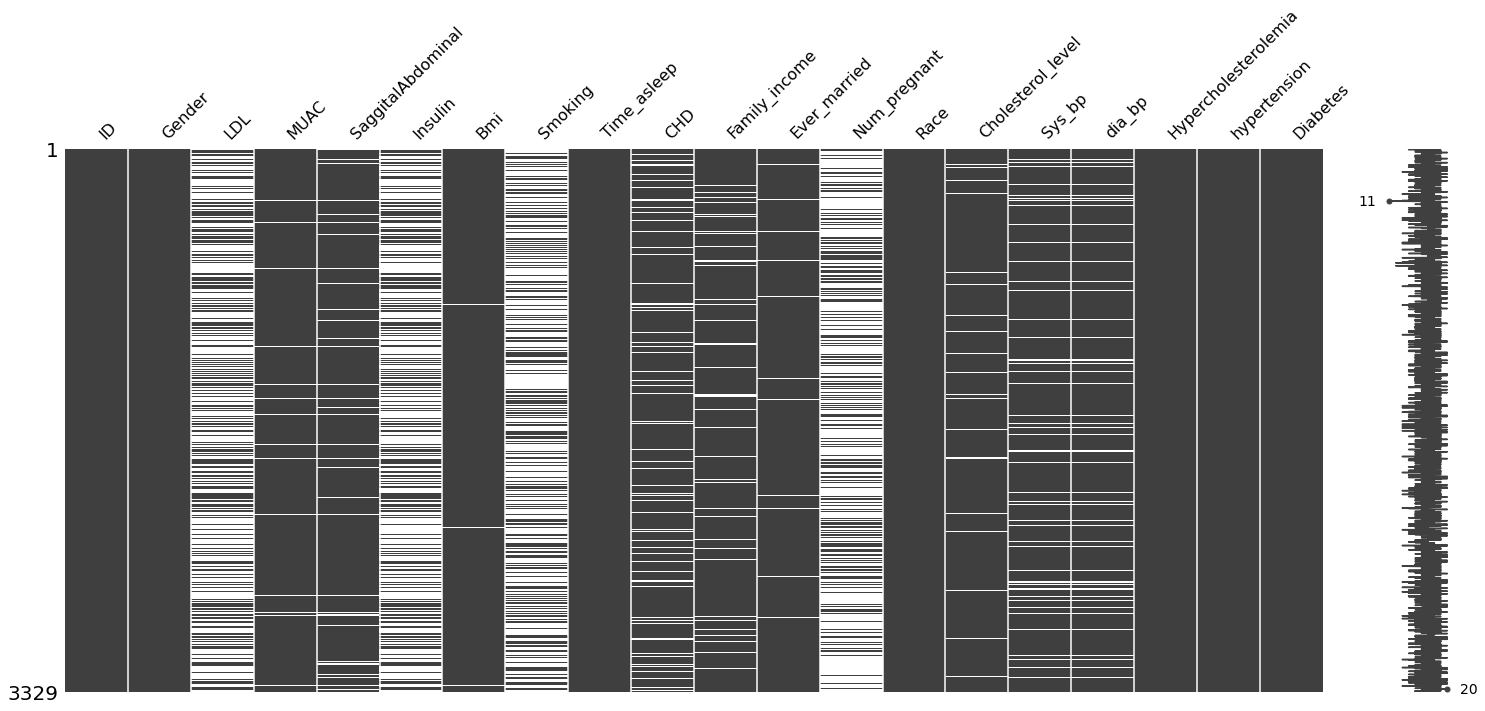

In [63]:
msno.matrix(df_train);

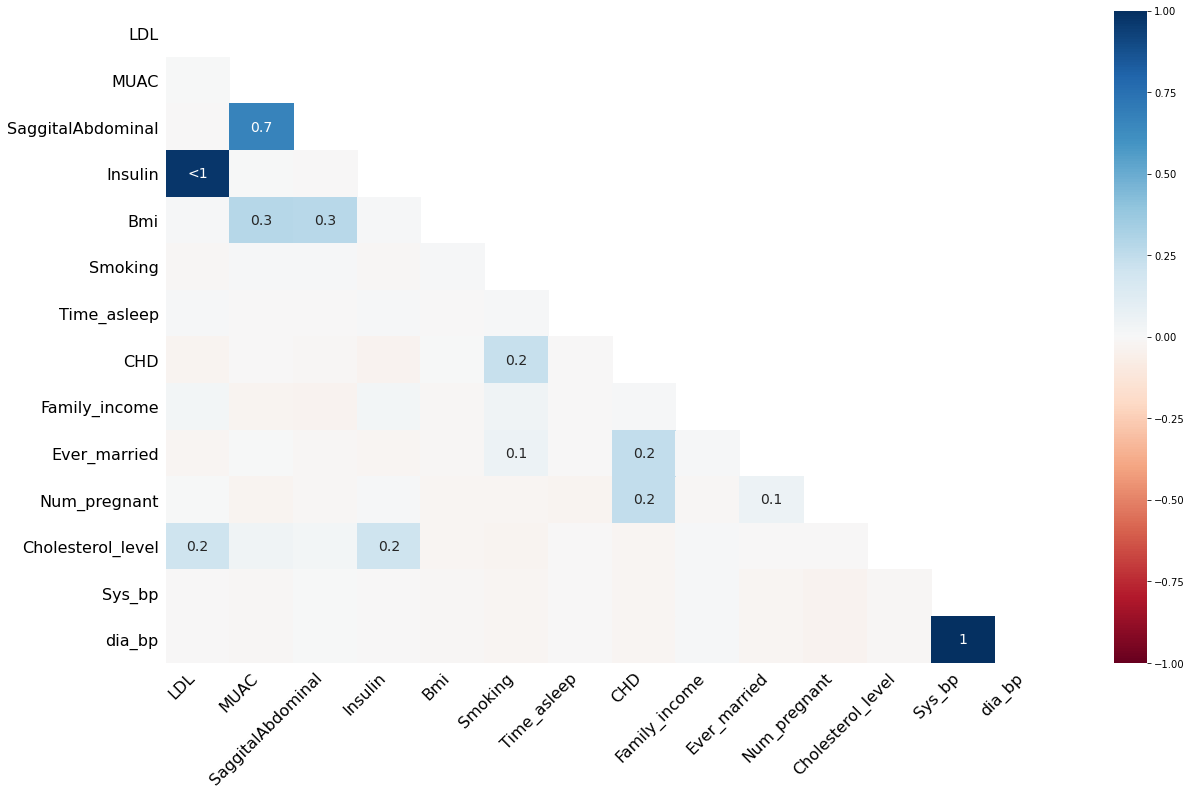

In [64]:
msno.heatmap(df_train);

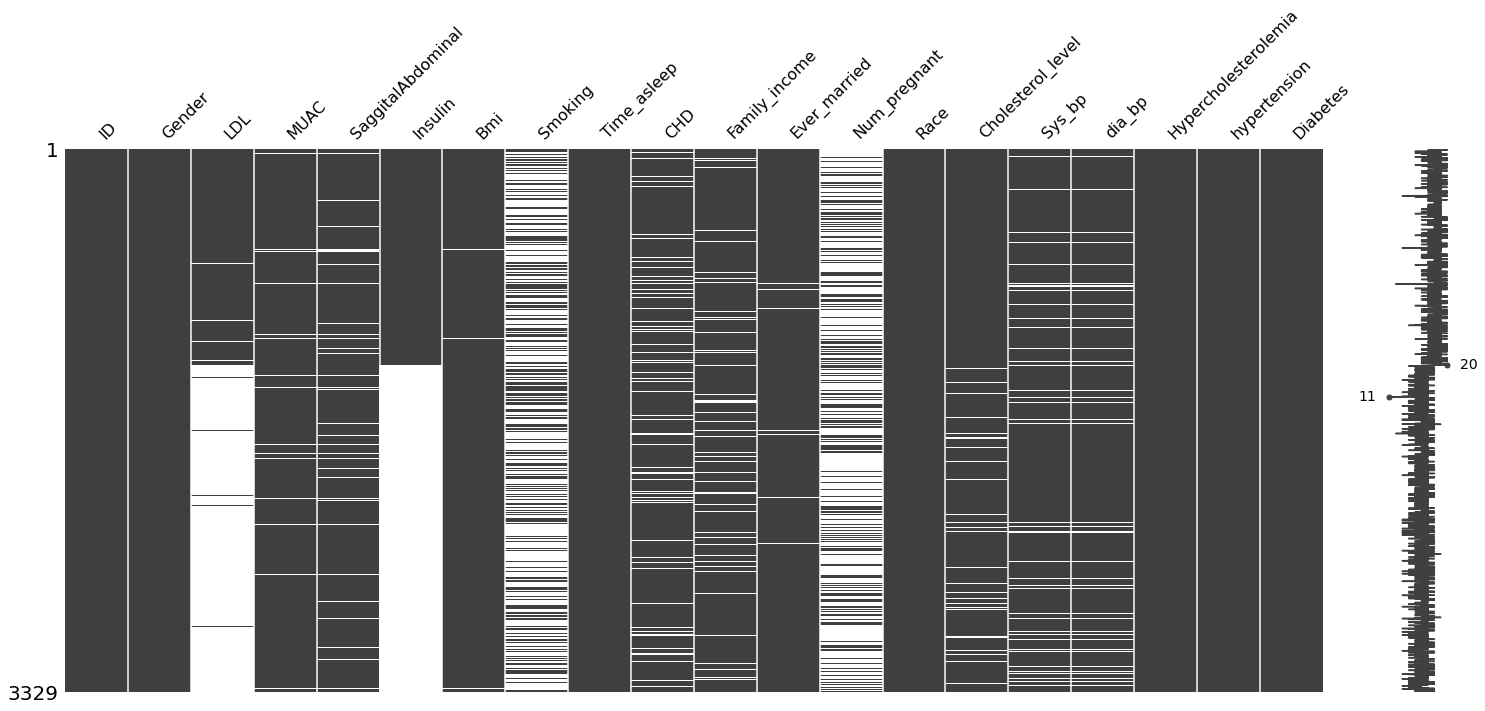

In [65]:
msno.matrix(df_train.sort_values("Insulin"));

 - Insulin and LDL are MCAR

In [66]:
train_knn_imputed = df_train.copy(deep = True)

In [67]:
knn_imp = KNNImputer(n_neighbors=3)
train_knn_imputed[["LDL","Insulin"]] = knn_imp.fit_transform(train_knn_imputed[["LDL","Insulin"]])

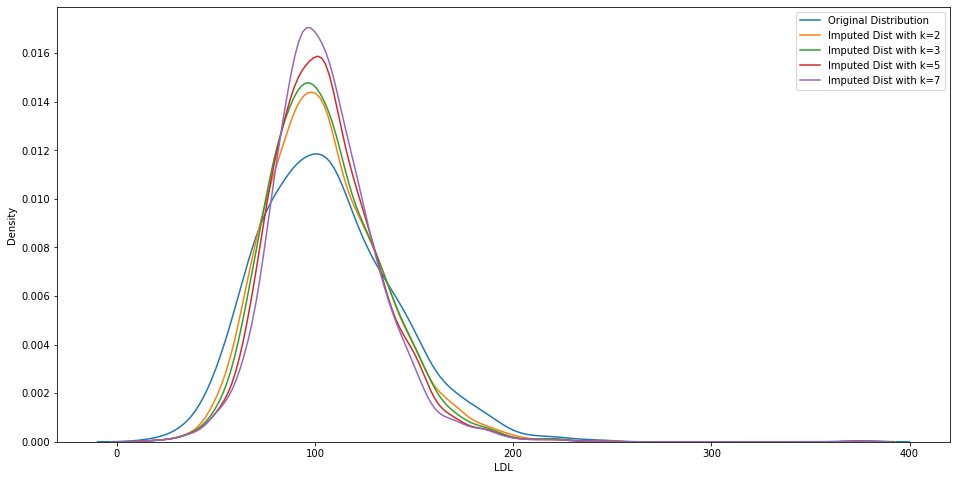

In [68]:
# testing for different K's
n_neighbors = [2,3,5,7]
fig, ax = plt.subplots(figsize=(16,8))
sns.kdeplot(df_train.LDL, label = "Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    train_knn_imputed.loc[:,:] = knn_imp.fit_transform(df_train)
    sns.kdeplot(train_knn_imputed.LDL, label = f"Imputed Dist with k={k}")

    
plt.legend();

--> k = 2 is the closiest to the original distribution, the k=2 gives the best imputation compare to others.

In [69]:
train_knn_imputed["LDL"].describe()

count    3329.000000
mean      105.029824
std        26.407088
min        15.000000
25%        88.000000
50%       102.428571
75%       119.857143
max       375.000000
Name: LDL, dtype: float64

In [70]:
train_knn_imputed["Insulin"].describe()

count    3329.000000
mean       13.377639
std        10.616745
min         0.140000
25%         8.387143
50%        11.254286
75%        15.437143
max       197.920000
Name: Insulin, dtype: float64

In [71]:
train_knn_imputed.isnull().sum()

ID                      0
Gender                  0
LDL                     0
MUAC                    0
SaggitalAbdominal       0
Insulin                 0
Bmi                     0
Smoking                 0
Time_asleep             0
CHD                     0
Family_income           0
Ever_married            0
Num_pregnant            0
Race                    0
Cholesterol_level       0
Sys_bp                  0
dia_bp                  0
Hypercholesterolemia    0
hypertension            0
Diabetes                0
dtype: int64

coooool

In [72]:
train_knn_imputed["Num_pregnant"].describe()

count    3329.000000
mean        3.348496
std         1.394155
min         1.000000
25%         2.714286
50%         3.142857
75%         4.000000
max        33.000000
Name: Num_pregnant, dtype: float64

In [73]:
train_knn_imputed.describe()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,78717.186843,1.533193,105.029824,31.277325,21.155757,13.377639,27.175720,2.136206,6.999743,1.988242,2.430171,2.443462,3.348496,3.129468,181.049264,117.580998,65.462787,1.726044,1.668970,1.919796
std,2899.190839,0.498972,26.407088,6.046704,4.831149,10.616745,7.347051,0.655467,2.674275,0.444291,1.582132,3.973534,1.394155,1.205357,40.489610,16.652770,13.851144,0.743189,0.552857,0.385894
min,73561.000000,1.000000,15.000000,14.600000,10.100000,0.140000,12.300000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,69.000000,64.666667,0.000000,1.000000,1.000000,1.000000
25%,76230.000000,1.000000,88.000000,27.300000,17.500000,8.387143,22.000000,1.857143,6.000000,2.000000,1.070000,1.000000,2.714286,3.000000,153.000000,106.666667,58.000000,1.000000,1.000000,2.000000
50%,78783.000000,2.000000,102.428571,31.300000,20.900000,11.254286,26.300000,2.142857,7.000000,2.000000,2.100000,1.000000,3.142857,3.000000,177.000000,115.333333,66.666667,2.000000,2.000000,2.000000
75%,81163.000000,2.000000,119.857143,34.900000,24.200000,15.437143,31.100000,2.714286,8.000000,2.000000,3.790000,3.000000,4.000000,4.000000,204.000000,125.619048,74.000000,2.000000,2.000000,2.000000
max,83731.000000,2.000000,375.000000,59.400000,40.100000,197.920000,70.100000,3.000000,99.000000,9.000000,5.000000,99.000000,33.000000,5.000000,813.000000,216.666667,113.333333,9.000000,9.000000,9.000000


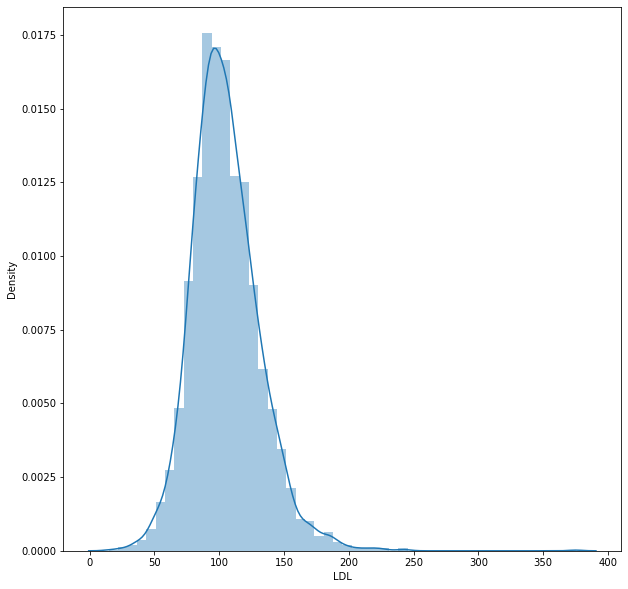

In [74]:
plt.figure(figsize=(10,10))
sns.distplot(train_knn_imputed["LDL"] );

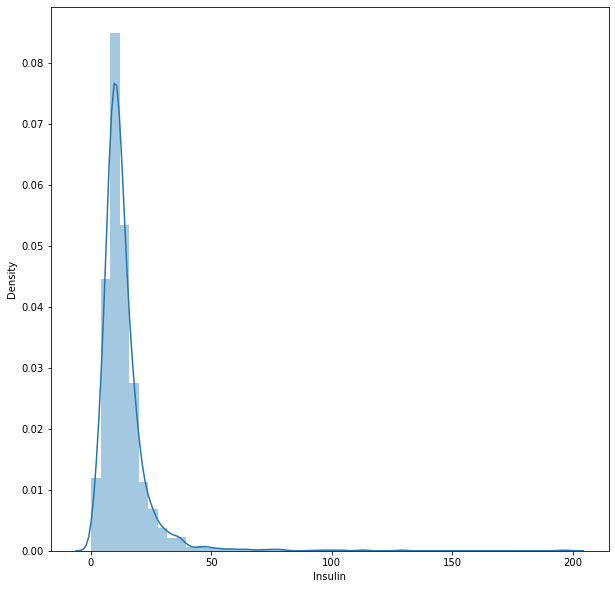

In [75]:
plt.figure(figsize=(10,10))
sns.distplot(train_knn_imputed["Insulin"] );

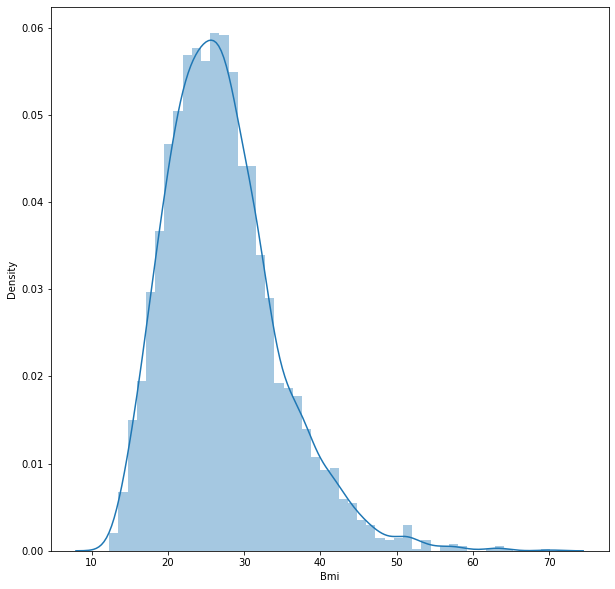

In [76]:
plt.figure(figsize=(10,10))
sns.distplot(train_knn_imputed["Bmi"] );

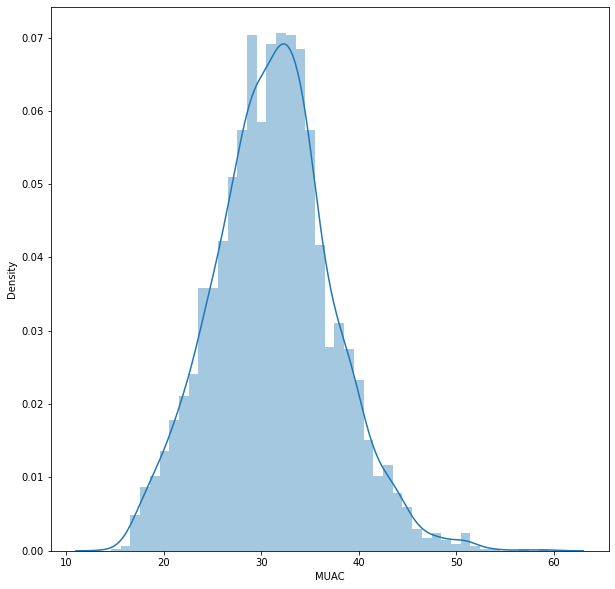

In [77]:
plt.figure(figsize=(10,10))
sns.distplot(train_knn_imputed["MUAC"] );

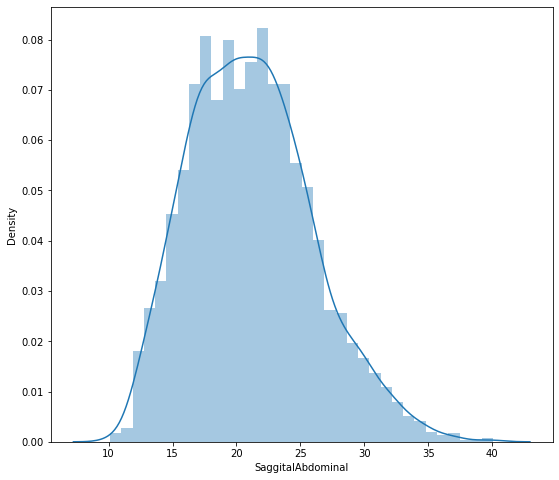

In [78]:
plt.figure(figsize=(9,8))
sns.distplot(train_knn_imputed["SaggitalAbdominal"] );

Let's find their correllation relationships

In [79]:
corr = train_knn_imputed.drop('ID', axis=1).corr()

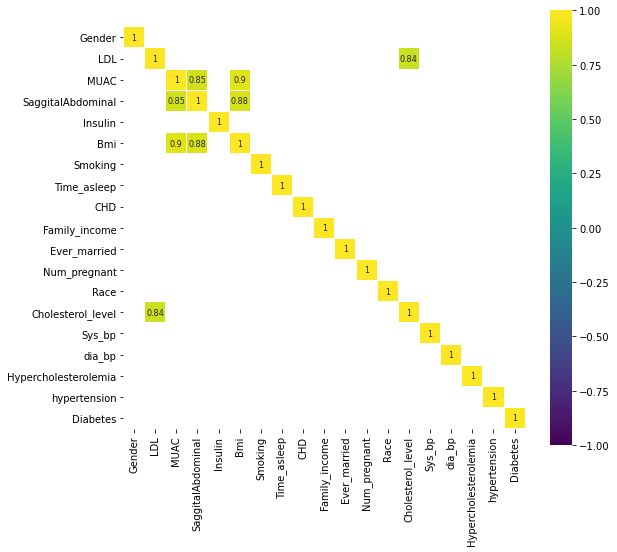

In [80]:
plt.figure(figsize=(9, 8))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

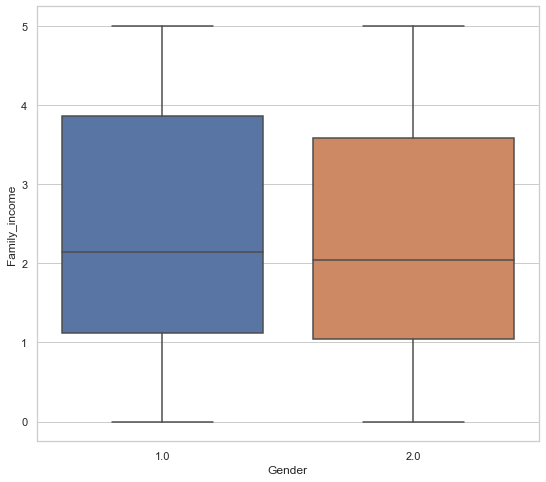

In [81]:
plt.figure(figsize=(9, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(data = train_knn_imputed, x = "Gender", y = "Family_income");

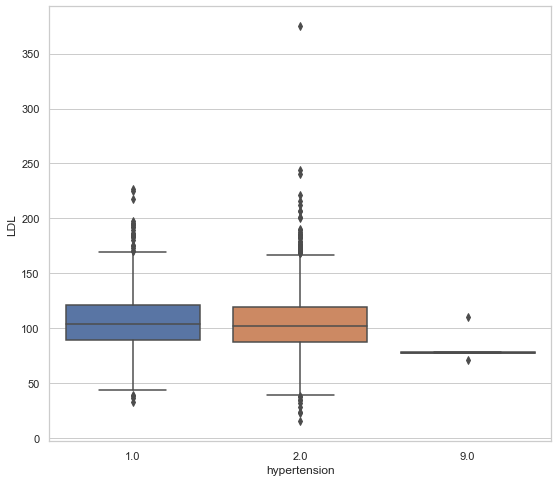

In [82]:
plt.figure(figsize=(9, 8))
sns.boxplot(data = train_knn_imputed, y = "LDL", x = "hypertension");

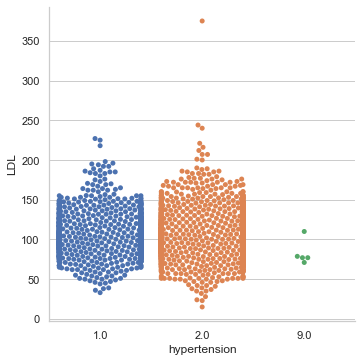

In [83]:
sns.catplot(x="hypertension", y="LDL", kind = "swarm", data=train_knn_imputed);

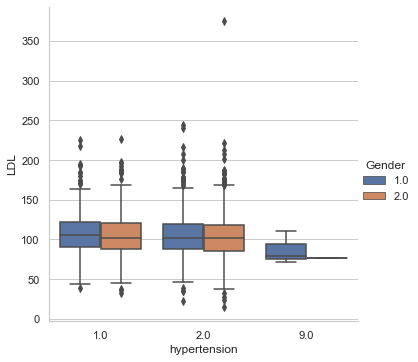

In [84]:
sns.catplot(x="hypertension", y="LDL", hue="Gender", kind="box", data=train_knn_imputed);

In [85]:
train_knn_imputed[['hypertension', 'Diabetes', 'Hypercholesterolemia']] = train_knn_imputed[['hypertension', 'Diabetes', 'Hypercholesterolemia']].astype('int64')

In [86]:
train_knn_imputed.columns

Index(['ID', 'Gender', 'LDL', 'MUAC', 'SaggitalAbdominal', 'Insulin', 'Bmi',
       'Smoking', 'Time_asleep', 'CHD', 'Family_income', 'Ever_married',
       'Num_pregnant', 'Race', 'Cholesterol_level', 'Sys_bp', 'dia_bp',
       'Hypercholesterolemia', 'hypertension', 'Diabetes'],
      dtype='object')

In [87]:
train_knn_imputed.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,81974.0,2.0,101.285714,36.5,22.3,16.614286,30.5,2.000000,8.0,2.0,3.480000,2.0,3.000000,3.0,187.0,114.000000,69.333333,1,2,2
1,81093.0,1.0,101.000000,46.7,29.4,8.590000,51.9,3.000000,7.0,2.0,2.500000,2.0,3.285714,3.0,171.0,116.666667,66.666667,2,1,3
2,78298.0,2.0,78.857143,31.2,20.6,5.491429,25.4,2.000000,8.0,2.0,1.700000,1.0,4.000000,3.0,92.0,101.333333,57.333333,1,2,2
3,83171.0,1.0,97.857143,37.5,21.5,11.785714,32.9,2.285714,7.0,2.0,5.000000,1.0,2.714286,5.0,175.0,111.333333,68.000000,2,2,2
4,76126.0,2.0,113.000000,47.7,30.6,11.287143,47.2,1.857143,8.0,2.0,2.442857,1.0,5.000000,1.0,200.0,119.238095,61.714286,2,1,2


In [88]:
discrete_col = [ 'CHD', 'Family_income', 'Ever_married',
       'Num_pregnant', 'Race', 
       'Hypercholesterolemia', 'hypertension', 'Diabetes']

In [89]:
for col in discrete_col:
    train_knn_imputed[col] = train_knn_imputed[col].apply(np.ceil)

In [90]:
train_knn_imputed["Smoking"] = train_knn_imputed["Smoking"].apply(np.ceil)

smoking 1->Everyday , 2->Somedays, 3->Notaltall

In [91]:
train_knn_imputed["Smoking"].value_counts()

3.0    1885
2.0     931
1.0     513
Name: Smoking, dtype: int64

In [92]:
train_knn_imputed["Time_asleep"] = train_knn_imputed["Time_asleep"].apply(np.ceil)

Time_asleep 2 to 11->ranges of values 12->12hours or more, 99->Refused

In [93]:
train_knn_imputed["Time_asleep"].value_counts()

8.0     928
7.0     877
6.0     776
5.0     287
9.0     180
4.0     121
10.0     90
3.0      27
12.0     23
2.0      12
11.0      6
99.0      2
Name: Time_asleep, dtype: int64

Ever had Coronary hearth diseases 1->yes, 2->no, 7->refused 9->don't know

In [94]:
train_knn_imputed["CHD"].value_counts()

2.0    3201
1.0     111
9.0      11
3.0       6
Name: CHD, dtype: int64

Marital status 1->married, 2->widowed, 3->divorced, 4->divorced, 5->never married, 6->living with patner, 77->refused, 
99->don't know

In [95]:
train_knn_imputed["Ever_married"].value_counts()

1.0     1870
5.0      443
3.0      435
2.0      254
6.0      208
4.0      112
77.0       6
99.0       1
Name: Ever_married, dtype: int64

how many times have you been pregnanant?

In [96]:
train_knn_imputed["Num_pregnant"].value_counts()

4.0     1189
3.0     1043
5.0      417
2.0      346
1.0      163
6.0       80
7.0       42
8.0       25
9.0       13
11.0       4
10.0       2
12.0       2
33.0       1
18.0       1
13.0       1
Name: Num_pregnant, dtype: int64

Race/Ethnicity 1->Mexican American, 2->Other Hispanic, 3->Non-Hispanic White, 4->Non-Hispanic Black, 5->Other Race-Including Multi-Racial

In [97]:
train_knn_imputed["Race"].value_counts()

3.0    1381
4.0     684
5.0     498
1.0     483
2.0     283
Name: Race, dtype: int64

had hypertension, also called high blood pressure? 1->yes, 2->no, 9->don't know

In [98]:
train_knn_imputed["hypertension"].value_counts()

2.0    2187
1.0    1137
9.0       5
Name: hypertension, dtype: int64

In [99]:
train_knn_imputed["hypertension"].replace(to_replace = [3,9], value = [2,2], inplace = True)

In [100]:
train_knn_imputed["hypertension"].value_counts()

2.0    2192
1.0    1137
Name: hypertension, dtype: int64

Diabetes 1->yes, 2->no, 3->borderline, 7->refused, 9->don't know

In [101]:
train_knn_imputed["Diabetes"].value_counts()

2.0    2860
1.0     371
3.0      97
9.0       1
Name: Diabetes, dtype: int64

In [102]:
train_knn_imputed["Diabetes"].replace(to_replace = [3,9], value = [2,2], inplace = True)

Hypercholesterolemia 1->yes, 2->no, 7->refused, 9->don't know

In [103]:
train_knn_imputed["Hypercholesterolemia"].value_counts()

2.0    2249
1.0    1059
9.0      21
Name: Hypercholesterolemia, dtype: int64

In [104]:
train_knn_imputed["Hypercholesterolemia"].replace(to_replace = 9, value = 2, inplace = True)

In [105]:
train_knn_imputed["Hypercholesterolemia"].value_counts()

2.0    2270
1.0    1059
Name: Hypercholesterolemia, dtype: int64

In [106]:
targets_ = ['Hypercholesterolemia', 
            'hypertension', 'Diabetes']
bi = {1: 0, 2: 1}
for col in targets_:
    train_knn_imputed[col].replace(bi, inplace = True)
    print(train_knn_imputed[col].value_counts())
    

1.0    2270
0.0    1059
Name: Hypercholesterolemia, dtype: int64
1.0    2192
0.0    1137
Name: hypertension, dtype: int64
1.0    2958
0.0     371
Name: Diabetes, dtype: int64


In [107]:
# People that have hypertension and diabetes
train_knn_imputed[(train_knn_imputed["hypertension"]==1) & (train_knn_imputed["Diabetes"] == 1)]["Ever_married"].value_counts()

1.0     1174
5.0      315
3.0      265
6.0      160
2.0      100
4.0       66
77.0       2
Name: Ever_married, dtype: int64

In [108]:
pd.crosstab(train_knn_imputed['hypertension'], train_knn_imputed['Gender']) 
            #values=train_knn_imputed['Age'], aggfunc=np.mean)

Gender,1.0,2.0
hypertension,,
0.0,507,630
1.0,1047,1145


0---> yes, 1---> No

In [109]:
pd.crosstab(train_knn_imputed['hypertension'], train_knn_imputed['Gender'], normalize = True) 


Gender,1.0,2.0
hypertension,,
0.0,0.152298,0.189246
1.0,0.314509,0.343947


In [110]:
# sc = StandardScaler()

In [111]:
train_knn_imputed.columns

Index(['ID', 'Gender', 'LDL', 'MUAC', 'SaggitalAbdominal', 'Insulin', 'Bmi',
       'Smoking', 'Time_asleep', 'CHD', 'Family_income', 'Ever_married',
       'Num_pregnant', 'Race', 'Cholesterol_level', 'Sys_bp', 'dia_bp',
       'Hypercholesterolemia', 'hypertension', 'Diabetes'],
      dtype='object')

In [112]:
from sklearn import model_selection


In [113]:
train_knn_imputed.shape

(3329, 20)

In [114]:
train_knn_imputed['Diabetes'].shape

(3329,)

In [115]:
train_knn_imputed.shape

(3329, 20)

In [116]:
import sys
sys.path.append('./iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [117]:
targets_scored = train_knn_imputed[['ID','Hypercholesterolemia', 'hypertension', 'Diabetes']]

In [118]:
targets_scored.loc[:, 'fold'] = -1 # Create a new column `fold` containing `-1`s.
targets_scored = targets_scored.sample(frac=1).reset_index(drop=True) # Shuffle the rows.
targets = targets_scored.drop('ID', axis=1).values # Extract the targets as an array.

In [119]:
mskf = MultilabelStratifiedKFold(n_splits=5)

In [120]:
for fold_, (train_, valid_) in enumerate(mskf.split(X=targets_scored, y=targets)):
    targets_scored.loc[valid_, 'fold'] = fold_
    
targets_scored.to_csv('./targets_with_folds.csv', index=False)

In [121]:
t_new = pd.read_csv('./targets_with_folds.csv')

In [122]:
t_new.head()

,ID,Hypercholesterolemia,hypertension,Diabetes,fold
0,83597.0,1.0,1.0,1.0,0
1,80447.0,0.0,0.0,1.0,3
2,78597.0,1.0,1.0,1.0,2
3,77732.0,0.0,1.0,1.0,1
4,77644.0,1.0,1.0,1.0,3


In [123]:
new_train_knn_imputed = train_knn_imputed.drop(['Hypercholesterolemia', 'hypertension', 'Diabetes'],axis=1)

In [124]:
tot_data = pd.merge(new_train_knn_imputed,t_new,on='ID')

In [125]:
tot_data.shape

(3329, 21)

In [126]:
tot_data.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,...,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes,fold
0,81974.0,2.0,101.285714,36.5,22.3,16.614286,30.5,2.0,8.0,2.0,...,2.0,3.0,3.0,187.0,114.000000,69.333333,0.0,1.0,1.0,1
1,81093.0,1.0,101.000000,46.7,29.4,8.590000,51.9,3.0,7.0,2.0,...,2.0,4.0,3.0,171.0,116.666667,66.666667,1.0,0.0,1.0,1
2,78298.0,2.0,78.857143,31.2,20.6,5.491429,25.4,2.0,8.0,2.0,...,1.0,4.0,3.0,92.0,101.333333,57.333333,0.0,1.0,1.0,4
3,83171.0,1.0,97.857143,37.5,21.5,11.785714,32.9,3.0,7.0,2.0,...,1.0,3.0,5.0,175.0,111.333333,68.000000,1.0,1.0,1.0,2
4,76126.0,2.0,113.000000,47.7,30.6,11.287143,47.2,2.0,8.0,2.0,...,1.0,5.0,1.0,200.0,119.238095,61.714286,1.0,0.0,1.0,4


In [127]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Diabetes']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Diabetes']].values
    y_valid = mlb.fit_transform(y_valid)
    ran = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l2'))
    clf = ran.fit(x_train, np.array(y_train))
    preds = clf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

    

Fold=0, Accuracy=0.8902255639097745
Fold=1, Accuracy=0.8873873873873874
Fold=2, Accuracy=0.003003003003003003
Fold=3, Accuracy=0.0015015015015015015
Fold=4, Accuracy=0.8888888888888888


In [128]:
print(classification_report(y_valid, preds))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.89      1.00      0.94       592

   micro avg       0.89      0.89      0.89       666
   macro avg       0.44      0.50      0.47       666
weighted avg       0.79      0.89      0.84       666
 samples avg       0.89      0.89      0.89       666



TEST DATA

prediction on test data

In [129]:
df_test.isnull().sum()

ID                        0
Gender                    0
LDL                     832
MUAC                     47
SaggitalAbdominal        98
Insulin                 835
Bmi                      14
Smoking                 848
Time_asleep               1
CHD                     150
Family_income           116
Ever_married             13
Num_pregnant            928
Race                      0
Cholesterol_level        88
Sys_bp                   95
dia_bp                   95
Hypercholesterolemia      0
hypertension              0
Diabetes                  0
dtype: int64

In [130]:
df_test.loc[:,:] = knn_imp.fit_transform(df_test)


In [131]:
df_test.head()

,ID,Gender,LDL,MUAC,SaggitalAbdominal,Insulin,Bmi,Smoking,Time_asleep,CHD,Family_income,Ever_married,Num_pregnant,Race,Cholesterol_level,Sys_bp,dia_bp,Hypercholesterolemia,hypertension,Diabetes
0,75553.0,1.0,124.000000,32.500000,27.000000,13.041429,30.600000,3.000000,8.0,2.0,2.36,1.0,3.571429,1.0,230.0,117.333333,53.333333,2.0,1.0,2.0
1,82373.0,2.0,74.428571,25.400000,16.500000,10.725714,20.900000,1.285714,8.0,2.0,5.00,3.0,2.714286,5.0,142.0,111.333333,66.666667,2.0,2.0,2.0
2,82340.0,1.0,92.857143,30.457143,20.657143,12.721429,25.885714,3.000000,6.0,1.0,2.30,1.0,2.142857,4.0,181.0,95.333333,47.333333,2.0,2.0,1.0
3,74991.0,2.0,99.142857,27.200000,18.300000,21.207143,24.400000,2.285714,6.0,2.0,4.25,1.0,3.285714,5.0,149.0,106.000000,57.333333,2.0,2.0,2.0
4,74594.0,1.0,123.142857,38.200000,27.900000,20.704286,35.100000,1.000000,9.0,2.0,0.54,1.0,4.571429,3.0,194.0,117.333333,64.000000,2.0,1.0,2.0


In [132]:
df_test["hypertension"].value_counts()

2.0    970
1.0    457
Name: hypertension, dtype: int64

In [133]:
df_test["Diabetes"].replace(to_replace = [3,9], value = [2,2], inplace = True)

In [134]:
df_test["hypertension"].replace(to_replace = [3,9], value = [2,2], inplace = True)

In [135]:
df_test["Hypercholesterolemia"].replace(to_replace = 9, value = 2, inplace = True)

In [136]:
df_test["hypertension"].value_counts()

2.0    970
1.0    457
Name: hypertension, dtype: int64

In [137]:
bi = {1: 0, 2: 1}
for col in targets_:
    df_test[col].replace(bi, inplace = True)
    print(df_test[col].value_counts())

1.0    991
0.0    436
Name: Hypercholesterolemia, dtype: int64
1.0    970
0.0    457
Name: hypertension, dtype: int64
1.0    1264
0.0     163
Name: Diabetes, dtype: int64


In [138]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'Diabetes']].values

In [139]:
pred_test = clf.predict(x_test)

In [140]:
y_test = mlb.fit_transform(y_test)

In [141]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)


In [142]:
test_accuracy

0.885073580939033

In [219]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Diabetes']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Diabetes']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = OneVsRestClassifier(RandomForestClassifier())
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

    

Fold=0, Accuracy=0.8902255639097745
Fold=1, Accuracy=0.8828828828828829
Fold=2, Accuracy=0.8858858858858859
Fold=3, Accuracy=0.8873873873873874
Fold=4, Accuracy=0.8888888888888888


In [220]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'Diabetes']].values

In [221]:
pred_test = crf.predict(x_test)

In [222]:
y_test = np.argmax(y_test)

In [225]:
test_accuracy

0.8843728100911002

In [350]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Diabetes']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Diabetes']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = LinearRegression()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

    

Fold=0, Accuracy=0.8285714285714286
Fold=1, Accuracy=0.493993993993994
Fold=2, Accuracy=0.8873873873873874
Fold=3, Accuracy=0.8888888888888888
Fold=4, Accuracy=0.8888888888888888


In [351]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'Diabetes']].values

In [352]:
 pred_test = crf.predict(x_test)

In [353]:
 y_test = mlb.fit_transform(y_test)

In [354]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)


In [355]:
test_accuracy

0.877365101611773

In [154]:
from sklearn.svm import SVC
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Diabetes']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Diabetes']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = SVC(kernel= "linear")
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

    

Fold=0, Accuracy=0.8541353383458646
Fold=1, Accuracy=0.8768768768768769
Fold=2, Accuracy=0.8783783783783784
Fold=3, Accuracy=0.48348348348348347
Fold=4, Accuracy=0.8888888888888888


## hypertension

In [234]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['hypertension']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['hypertension']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = RandomForestClassifier()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))


Fold=0, Accuracy=0.6601503759398496
Fold=1, Accuracy=0.3843843843843844
Fold=2, Accuracy=0.018018018018018018
Fold=3, Accuracy=0.21171171171171171
Fold=4, Accuracy=0.6576576576576577


In [235]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'hypertension']].values

In [236]:
 pred_test = crf.predict(x_test)

In [237]:
 y_test = mlb.fit_transform(y_test)

In [238]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)


In [239]:
test_accuracy

0.6797477224947442

In [329]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression

fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['hypertension']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['hypertension']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = LinearRegression()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))


Fold=0, Accuracy=0.5834586466165413
Fold=1, Accuracy=0.524024024024024
Fold=2, Accuracy=0.5345345345345346
Fold=3, Accuracy=0.33483483483483484
Fold=4, Accuracy=0.5615615615615616


In [330]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'hypertension']].values

In [331]:
 pred_test = crf.predict(x_test)

In [332]:
 y_test = mlb.fit_transform(y_test)

In [333]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)

In [334]:
test_accuracy

0.606166783461808

In [343]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['hypertension']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['hypertension']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = LogisticRegression()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

Fold=0, Accuracy=0.5022556390977444
Fold=1, Accuracy=0.5975975975975976
Fold=2, Accuracy=0.024024024024024024
Fold=3, Accuracy=0.6531531531531531
Fold=4, Accuracy=0.6531531531531531


In [344]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_test = df_test[[ 'hypertension']].values

In [345]:
 pred_test = crf.predict(x_test)

In [346]:
 y_test = mlb.fit_transform(y_test)

In [347]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)

In [348]:
test_accuracy

0.6706377014716188

## Hypercholesterolemia

In [268]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Hypercholesterolemia']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Hypercholesterolemia']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = LogisticRegression()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

Fold=0, Accuracy=0.6526315789473685
Fold=1, Accuracy=0.003003003003003003
Fold=2, Accuracy=0.6816816816816816
Fold=3, Accuracy=0.2732732732732733
Fold=4, Accuracy=0.6786786786786787


In [269]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_testh = df_test[[ 'Hypercholesterolemia']].values

In [270]:
 pred_test = crf.predict(x_test)

In [271]:
 y_testh = mlb.fit_transform(y_testh)

In [272]:
test_accuracy = metrics.accuracy_score(y_testh, pred_test)

In [273]:
test_accuracy

0.6888577435178697

In [274]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Hypercholesterolemia']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Hypercholesterolemia']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = RandomForestClassifier()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))


Fold=0, Accuracy=0.3157894736842105
Fold=1, Accuracy=0.0
Fold=2, Accuracy=0.6126126126126126
Fold=3, Accuracy=0.6411411411411412
Fold=4, Accuracy=0.6816816816816816


In [275]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_testh = df_test[[ 'Hypercholesterolemia']].values

In [276]:
 pred_test = crf.predict(x_test)

In [277]:
 y_testh = mlb.fit_transform(y_testh)

In [278]:
test_accuracy = metrics.accuracy_score(y_testh, pred_test)

In [279]:
test_accuracy

0.6944639103013315

In [303]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression

fold = 5
for fold in range(fold):
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    tot_data_train = tot_data[tot_data.fold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    tot_data_valid = tot_data[tot_data.fold == fold].reset_index(drop=True)
    # drop the target columns from dataframe and convert it to
    # a numpy array by using .values.
    x_train = tot_data_train.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_train = tot_data_train[['Hypercholesterolemia']].values
    #Initializing MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    # similarly, for validation, we have
    x_valid = tot_data_valid.drop(["ID","fold",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
    y_valid = tot_data_valid[['Hypercholesterolemia']].values
    y_valid = mlb.fit_transform(y_valid)
    rf = LinearRegression()
    crf = ran.fit(x_train, np.array(y_train))
    preds = crf.predict(x_valid)
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")
    #print(classification_report(y_valid, preds))

Fold=0, Accuracy=0.0
Fold=1, Accuracy=0.0045045045045045045
Fold=2, Accuracy=0.021021021021021023
Fold=3, Accuracy=0.6801801801801802
Fold=4, Accuracy=0.6816816816816816


In [304]:
x_test = df_test.drop(["ID",'Hypercholesterolemia', 'hypertension', 'Diabetes'], axis=1).values
y_testh = df_test[[ 'Hypercholesterolemia']].values

In [305]:
 pred_test = crf.predict(x_test)

In [306]:
 y_testh = mlb.fit_transform(y_testh)

In [307]:
test_accuracy = metrics.accuracy_score(y_testh, pred_test)

In [308]:
test_accuracy

0.6937631394533987